In [1]:
# 데이터 구성 패키지 DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 시각화, subpackage pyplot
import matplotlib
import matplotlib.pyplot as plt

# 통계적 시각화 추세 패키지
import seaborn as sns

# 통계 분석 패키지
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest # 비율 검정

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [3]:
df_raw = pd.read_csv('data/MERGE후결측값제거.csv', engine = 'python', encoding= 'euc-kr')
df_raw.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK_x,TIME_2AG_x,TIME_3BUS_x,TIME_4DIELEC_x,TIME_5MGO_x,TIME_6PHOS_x,TIME_7PASTE_x,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,2019-04-11 13:25,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,2019-04-11 14:09,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,2019-04-11 14:53,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,2019-04-11 15:38,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51216 missing from current f

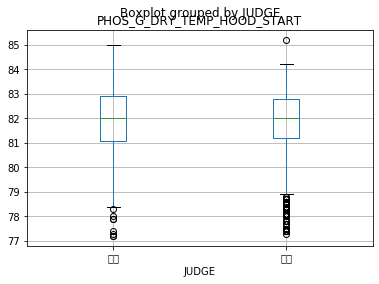

In [4]:
df_raw.boxplot('PHOS_G_DRY_TEMP_HOOD_START', by='JUDGE')

In [5]:
lm = ols('PHOS_G_DRY_TEMP_HOOD_START~C(JUDGE)', df_raw).fit()
print(anova_lm(lm))

              df       sum_sq   mean_sq         F    PR(>F)
C(JUDGE)     1.0     0.120888  0.120888  0.066421  0.796636
Residual  3436.0  6253.576125  1.820016       NaN       NaN


pvalue값 유의하지 않다